# Analisis Penyajian Data Weather Type Clasification

Friza Nur Fatmala  

NPM 23083010051

Kelas Analisis Data Eksploratif (EDA-A)

Tugas Analisis Penyajian Data Pertemuan 2

# Deskripsi Dataset

Data yang digunakan merupakan kumpulan data sintetis yang berisi berbagai variabel untuk melakukan klasifikasi terhadap tipe cuaca. Kumpulan data ini mencakup berbagai hal yang dapat memengaruhi cuaca di lokasi tertentu yakni pegunungan, daratan, dan pesisir. Tipe cuacanya sendiri terbagi menjadi empat jenis yaitu Rainy atau Hujan, Sunny atau Cerah, Cloudy atau Berawan, dan Snowy atau Bersalju. 

1. Suhu : Suhu dalam derajat Celsius, mulai dari dingin ekstrem hingga panas ekstrem.

2. Kelembapan : Persentase kelembapan dengan rentang antara 20 hingga 109.

3. Kecepatan Angin : Kecepatan angin dalam kilometer per jam

4. Curah Hujan (%) : Besarnya persentase curah hujan

5. Tutupan Awan : Deskripsi tutupan awan berupa cerah, berawan, atau mendung.

6. Tekanan Atmosfer : Tekanan atmosfer dalam hPa, yang mencakup rentang antara 800 hingga 1200.

7. Indeks UV : Indeks UV yang menunjukkan kekuatan radiasi ultraviolet. Rentangnya antara 0 hingga 14.

8. Musim : Musim ketika data direkam. Terdiri atas summer, autumn, winter, dan spring. 

9. Visibilitas (km) : Jarak pandang mata dalam satuan kilometer.

10. Lokasi : Jenis lokasi tempat data direkam, yaitu pegunungan, daratan, dan pesisir.

11. Tipe Cuaca : Variabel yang merupakan target untuk klasifikasi, yakni tipe-tipe cuaca yang mungkin tercipta akibat faktor-faktor tertentu.

In [1]:
# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Memasukkan dan menampilkan dataset 
df = pd.read_csv("C:\\Users\\friza nur fatmala\\Downloads\\weather_classification_data.csv")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
df.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


# Preprocessing Data

## Mengatasi Missing Value

In [4]:
np.sum(df.isnull())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Dataset dengan judul Weather Type ini tidak memiliki missing value pada semua variabelnya sehingga tidak perlu dilakukan manipulasi terhadap isi data.

## Menampilkan Informasi dalam Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Dataset ini terdiri atas 13200 baris dan 11 variabel yang meliputi Temperature, Humidity, Wind Speed, Precipitation (%), Cloud Cover, Atmospheric Pressure, UV Index, Season, Visibility (km), Location, dan Weather Type. Terdapat 7 variabel yang merupakan data numerik dengan 5 variabel bertipe float dan 2 variabel bertipe integer. Sementara itu, 4 varibel sisanya merupakan data kategorik dengan tipe data object.

## Mengecek Data Outlier

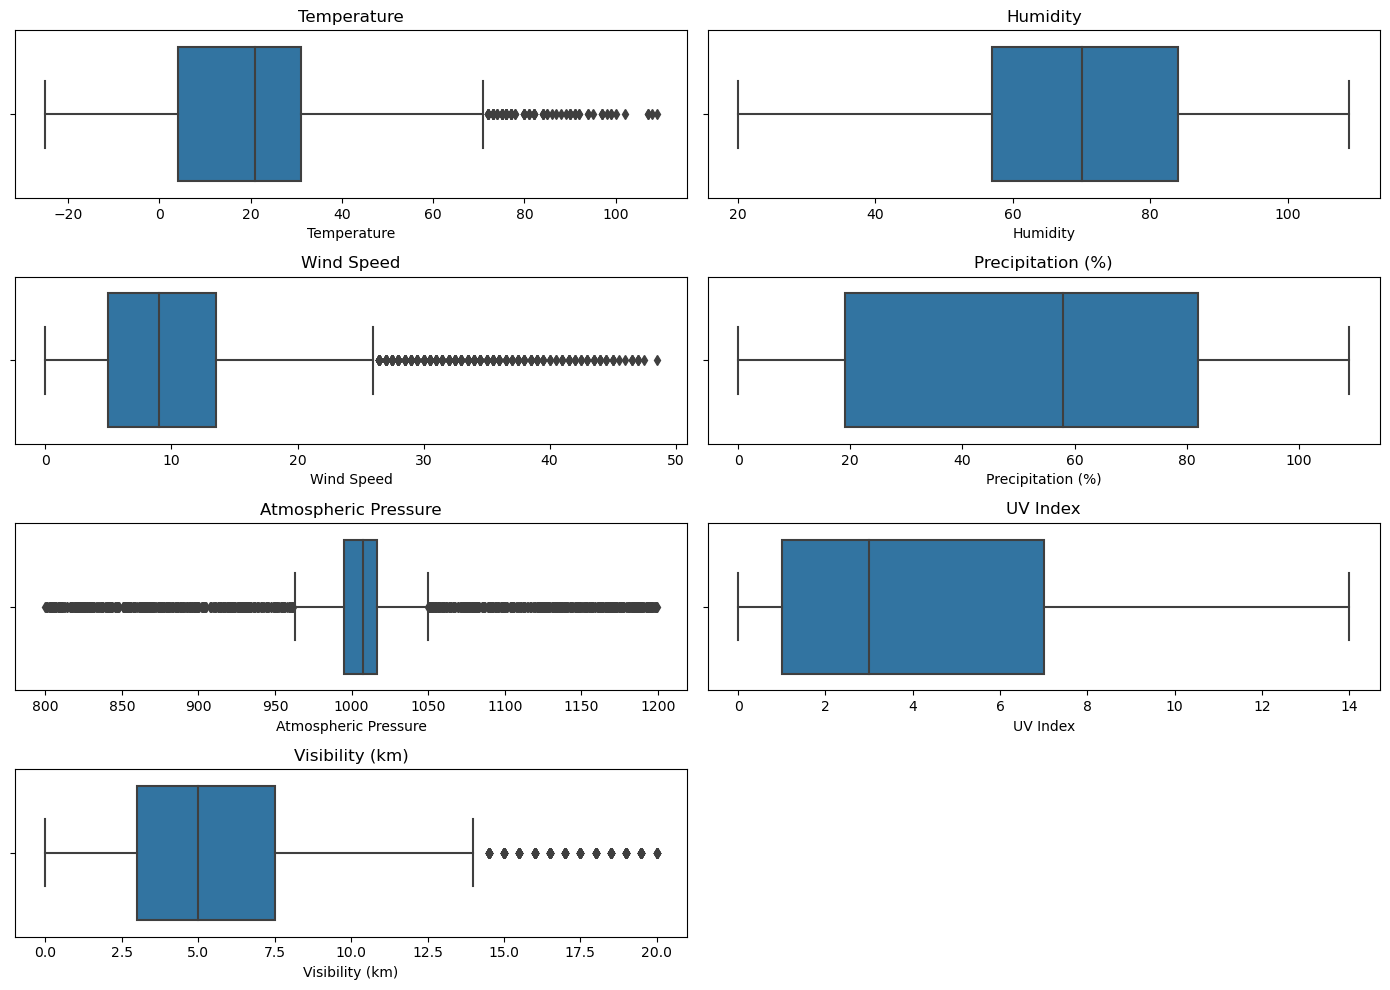

In [6]:
df_cont = df.drop(['Cloud Cover', 'Season', 'Location', 'Weather Type'], axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))  # Ukuran figurenya disesuaikan
feature_index = 0
for ii in range(4):  # 4 baris
    for jj in range(2):  # 2 kolom
        if feature_index < len(df_cont.columns):  # Pastikan hanya 7 plot yang dibuat
            ax = sns.boxplot(x=df_cont.iloc[:, feature_index], ax=axes[ii, jj], orient='h')  # orient='h' untuk horizontal
            ax.set(title=df_cont.columns.values[feature_index])
            feature_index += 1
        else:
            axes[ii, jj].axis('off')  # Matikan subplot kosong untuk output yang lebih bersih
plt.tight_layout()  # Sesuaikan tata letak agar tidak tumpang tindih
plt.show()

Berdasarkan box plot diatas, beberapa variabel seperti Temperature, Wind Speed, Atmospheric Pressure, dan Visibility (km) terlihat memiliki outlier pada datanya. Sedangkan variabel numerik lainnya yaitu Humidity, Precipitation (%), dan UV Indeks terlihat tidak memiliki outlier.

# Eksplorasi Data

## 1. Diagram Batang

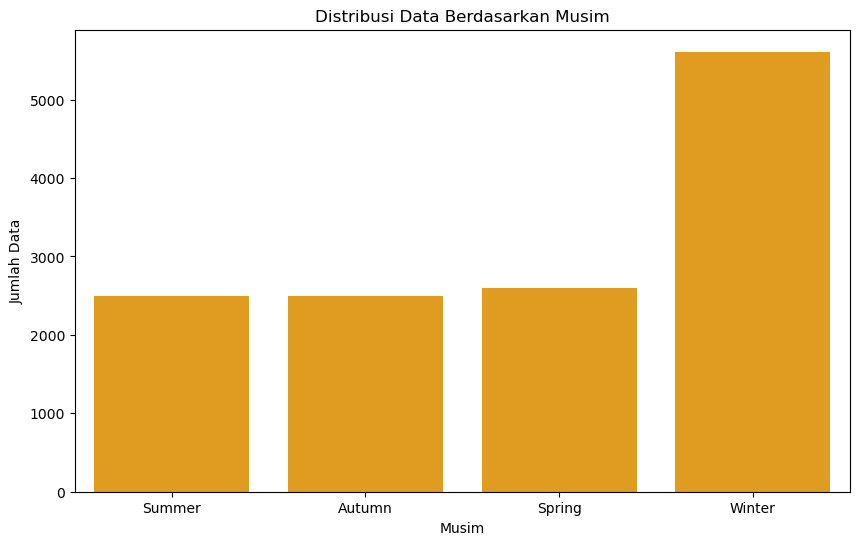

In [7]:
# Menggambarkan distribusi data berdasarkan musim
sorted_categories = df['Season'].value_counts().sort_values().index
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df, color='orange', order=sorted_categories) 
plt.title('Distribusi Data Berdasarkan Musim') 
plt.xlabel('Musim') 
plt.ylabel('Jumlah Data')  
plt.show()

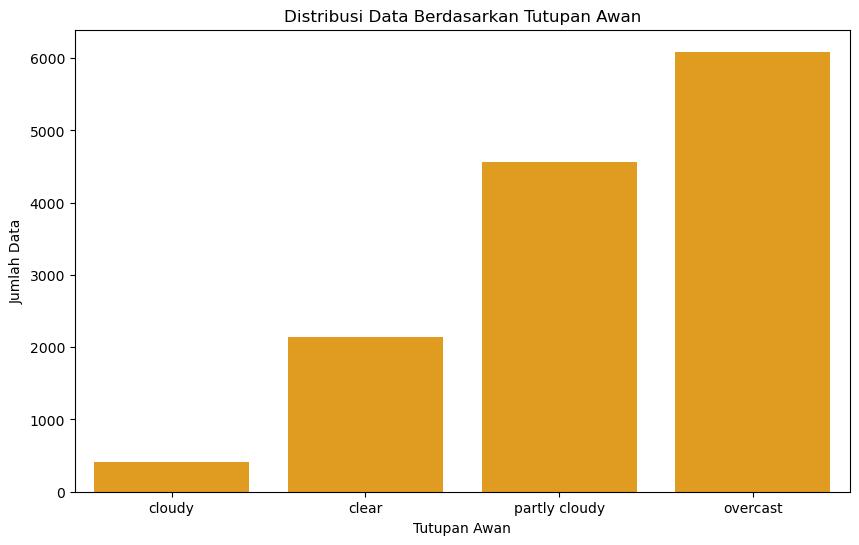

In [8]:
# Menggambarkan distribusi data berdasarkan tutupan awan
category_counts = df['Cloud Cover'].value_counts()
sorted_categories = category_counts.sort_values().index
plt.figure(figsize=(10, 6))
sns.countplot(x='Cloud Cover', data=df, color='orange', order=sorted_categories)
plt.title('Distribusi Data Berdasarkan Tutupan Awan') 
plt.xlabel('Tutupan Awan') 
plt.ylabel('Jumlah Data')  
plt.show()

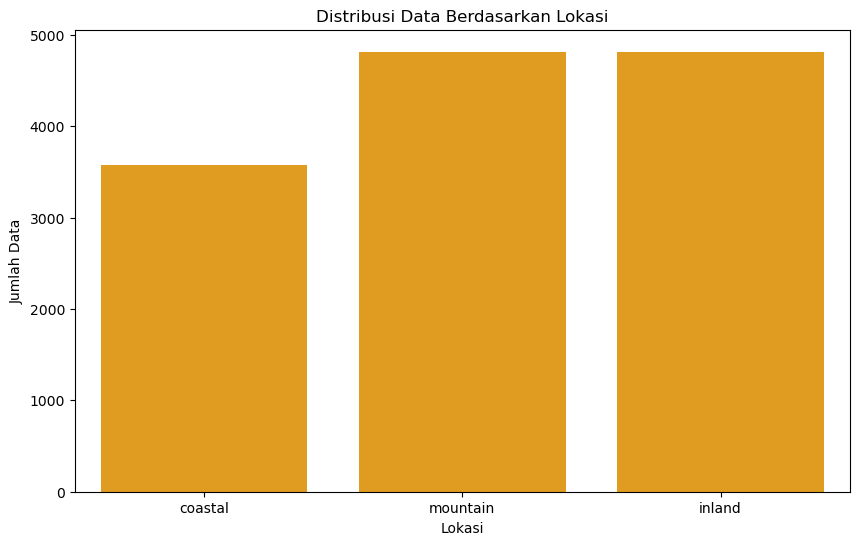

In [9]:
# Menggambarkan distribusi data berdasarkan lokasi
sorted_categories = df['Location'].value_counts().sort_values().index
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=df, color='orange', order=sorted_categories) 
plt.title('Distribusi Data Berdasarkan Lokasi') 
plt.xlabel('Lokasi') 
plt.ylabel('Jumlah Data')  
plt.show()

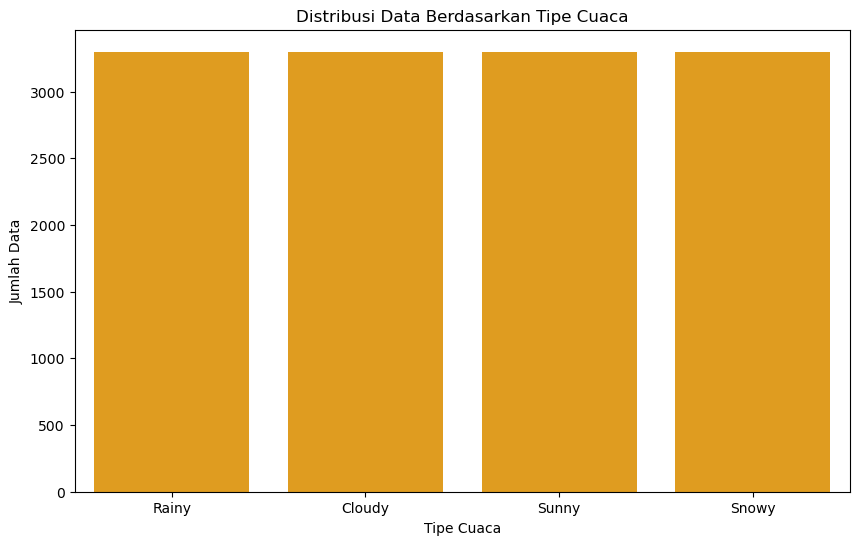

In [11]:
# Menggambarkan distribusi data berdasarkan tipe cuaca
sorted_categories = df['Weather Type'].value_counts().sort_values().index
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather Type', data=df, color='orange', order=sorted_categories) 
plt.title('Distribusi Data Berdasarkan Tipe Cuaca') 
plt.xlabel('Tipe Cuaca') 
plt.ylabel('Jumlah Data')  
plt.show()

Berdasarkan diagram batang diatas, dapat disimpulkan beberapa hal terkait dataset ini :
1. Dari diagram batang untuk variabel musim, terlihat bahwa musim dengan jumlah data terbesar adalah musim dingin (winter), sedangkan musim dengan jumlah data terkecil adalah musim panas (summer).

2. Dari diagram batang yang menggambarkan tutupan awan (cloud cover), diketahui bahwa kategori mendung memiliki frekuensi tertinggi, sedangkan kategori berawan memiliki frekuensi terendah.

3. Berdasarkan diagram batang variabel lokasi, jumlah data terbesar berasal dari wilayah daratan, sementara jumlah data terkecil berasal dari wilayah pesisir.

4. Diagram batang terakhir menunjukkan bahwa distribusi data pada variabel tipe cuaca bersifat merata, artinya setiap kategori memiliki jumlah data yang sama.

## 2. Diagram Pencar

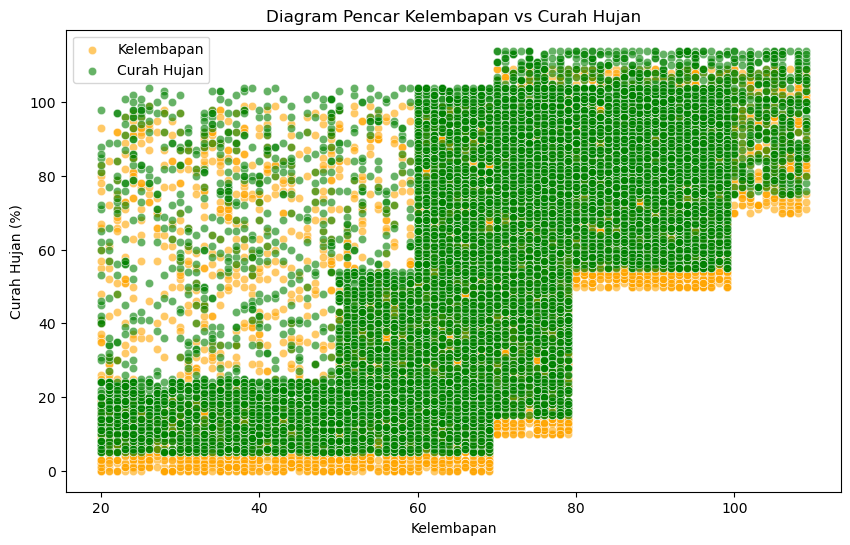

In [14]:
# Mengetahui adanya korelasi antara kelembapan dan curah hujan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity', y='Precipitation (%)', data=df, color='orange', label='Kelembapan', alpha=0.6)
sns.scatterplot(x='Humidity', y=df['Precipitation (%)'] + 5, data=df, color='green', label='Curah Hujan', alpha=0.6)
plt.title('Diagram Pencar Kelembapan vs Curah Hujan')  # Judul plot
plt.xlabel('Kelembapan')  # Label sumbu x
plt.ylabel('Curah Hujan (%)')  # Label sumbu y
plt.legend()
plt.show()

Berdasarkan Diagram Pencar ini, dapat diketahui bahwa variabel Humidity dan Precipitation (%) dalam dataset cenderung memiliki hubungan linier yang positif. Artinya, semakin tinggi kelembapan suatu tempat, semakin tinggi pula persentase curah hujan di tempat tersebut. Dari diagram ini pula, terlihat beberapa outlier pada masing-masing variabel.

## 3. Diagram Lingkaran

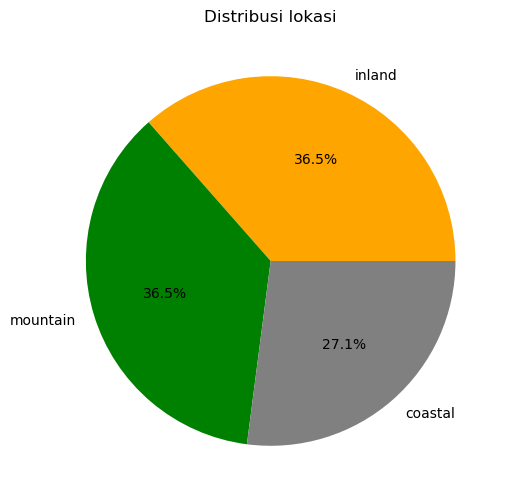

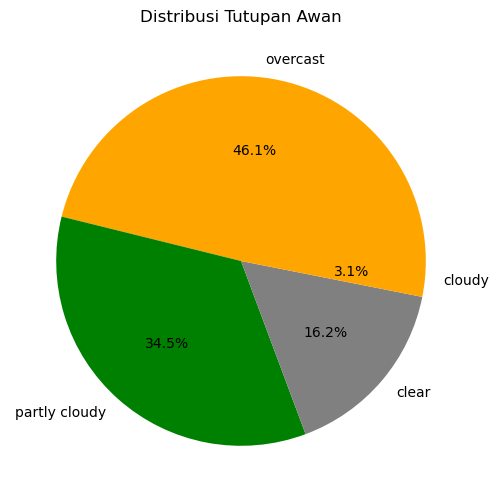

In [15]:
# Menampilkan distribusi jenis lokasi
Location_counts = df['Location'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(Location_counts, labels=Location_counts.index, autopct='%1.1f%%', colors=['orange', 'green','grey'])
plt.title('Distribusi lokasi')
plt.show()

# Menampilkan distribusi jenis tutupan awan
cloud_counts = df['Cloud Cover'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cloud_counts, labels=cloud_counts.index, autopct='%1.1f%%', colors=['orange', 'green','grey'])
plt.title('Distribusi Tutupan Awan')
plt.show()

Diagram lingkaran menunjukkan persentase frekuensi dari masing-masing variabel. Pada diagram variabel lokasi, persentase jumlah wilayah pegunungan dan daratan menunjukkan nilai yang sama yakni 36,5% sedangkan wilayah pesisir tetap menjadi yang terkecil dengan persentase sebesar 27,1%. Namun, hasil ini menunjukkan bahwa penggunaan diagram lingkaran pada variabel lokasi lebih baik daripada penggunaan diagram batang. Hal ini dikarenakan, diagram lingkaran memberikan hasil yang lebih detail terkait frekuensi data. Sedangkan pada diagram variabel tutupan awan, 46,1% merupakan persentase tertinggi yang kemudian dimiliki oleh kategori mendung. Persentase terendah dimiliki oleh kategori cerah. Hal ini berarti frekuensi kategori mendung pada variabel tutupan awan paling besar daripada kategori lain.

## 4. Histogram

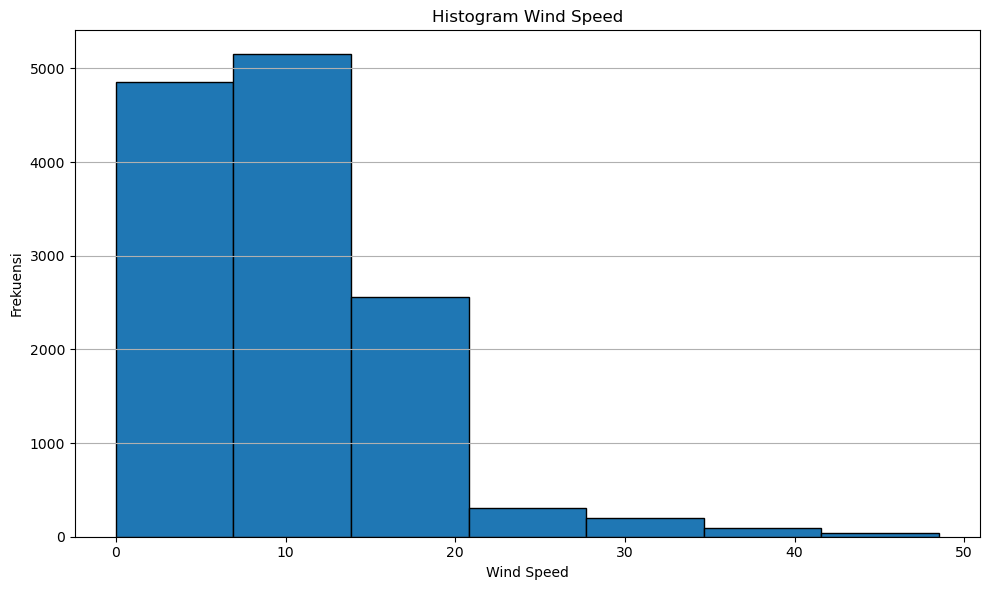

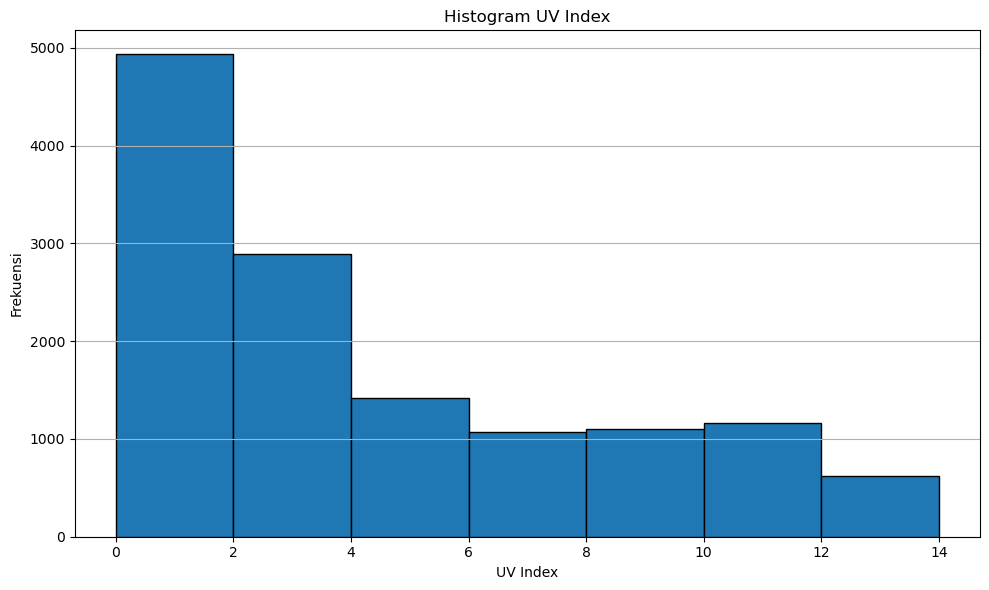

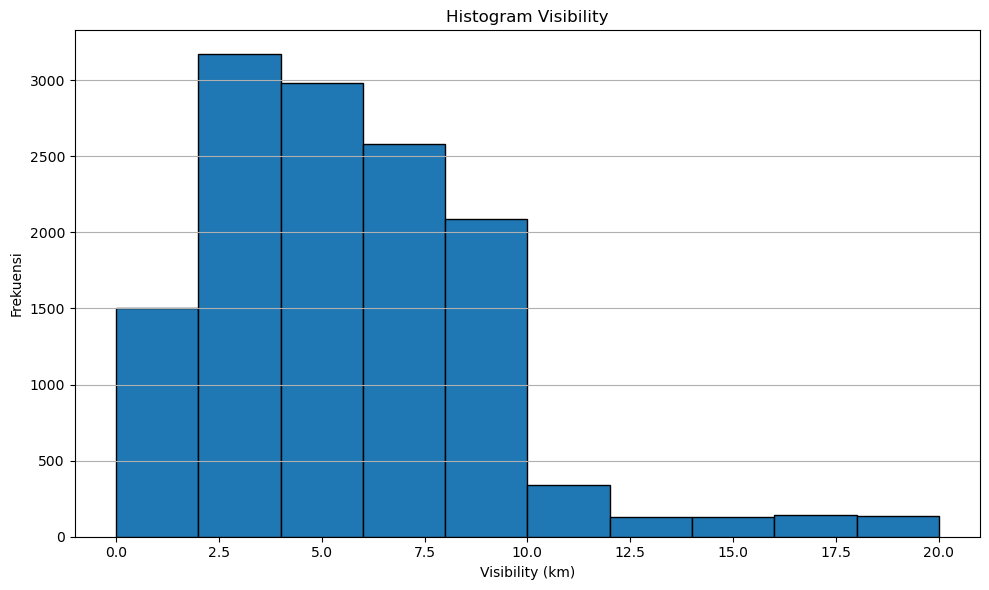

In [13]:
# Variabel Wind Speed
Wind_speed = df['Wind Speed']
plt.figure(figsize=(10, 6))
plt.hist(Wind_speed, bins=7, edgecolor='black')  
plt.title('Histogram Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Frekuensi')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Variabel UV Index
UV_Indeks = df['UV Index']
plt.figure(figsize=(10, 6))
plt.hist(UV_Indeks, bins=7, edgecolor='black')  
plt.title('Histogram UV Index')
plt.xlabel('UV Index')
plt.ylabel('Frekuensi')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Variabel Visibility
Visibility = df['Visibility (km)']
plt.figure(figsize=(10, 6))
plt.hist(Visibility, bins=10, edgecolor='black')  
plt.title('Histogram Visibility')
plt.xlabel('Visibility (km)')
plt.ylabel('Frekuensi')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 5. Diagram Lolipop

C:\Users\friza nur fatmala\AppData\Local\Temp\ipykernel_5588\3238014012.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq1.index, freq1.values, basefmt=" ", use_line_collection=True)


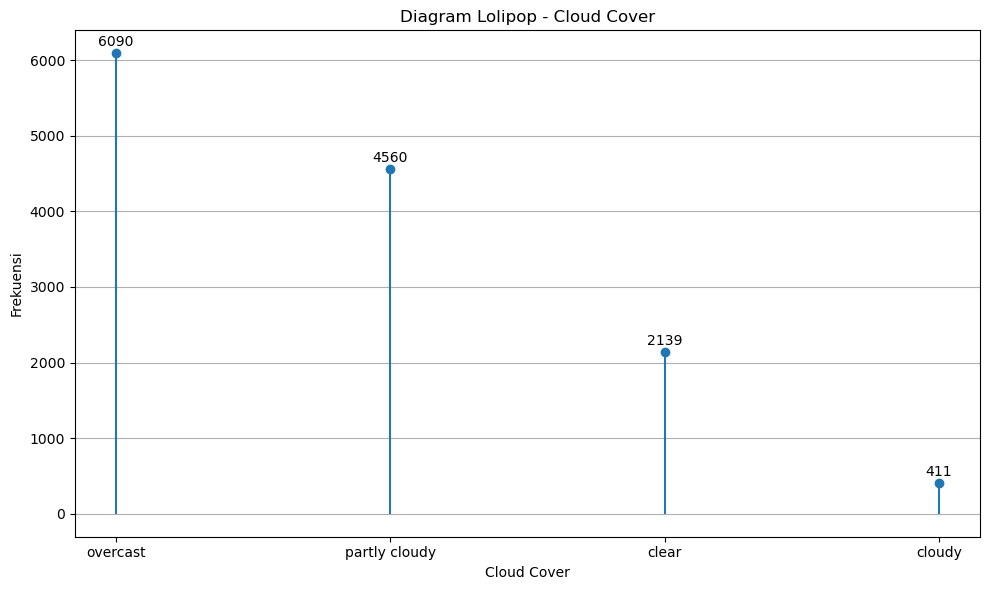

C:\Users\friza nur fatmala\AppData\Local\Temp\ipykernel_5588\3238014012.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq2.index, freq2.values, basefmt=" ", use_line_collection=True)


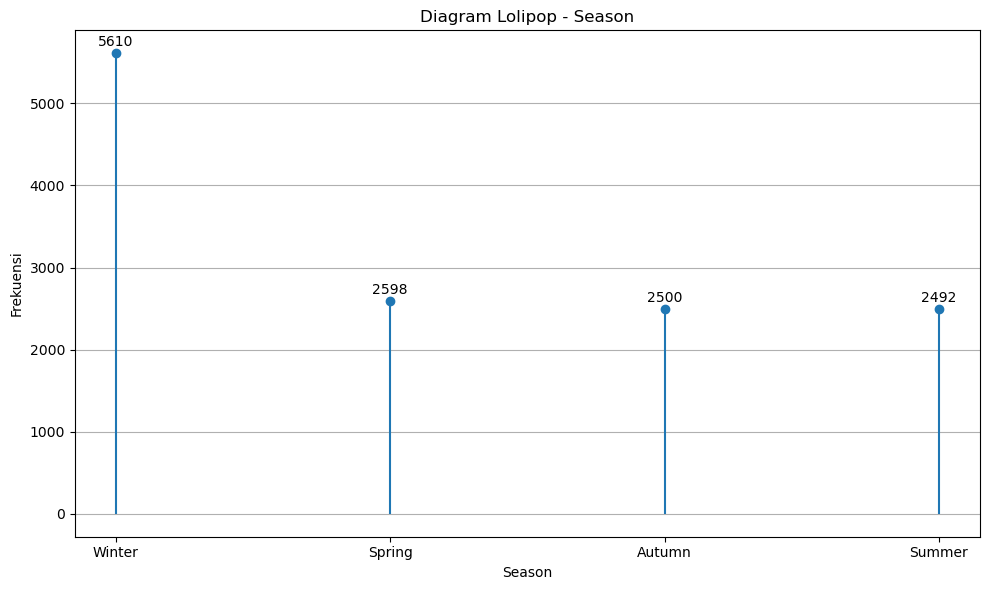

C:\Users\friza nur fatmala\AppData\Local\Temp\ipykernel_5588\3238014012.py:33: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq3.index, freq3.values, basefmt=" ", use_line_collection=True)


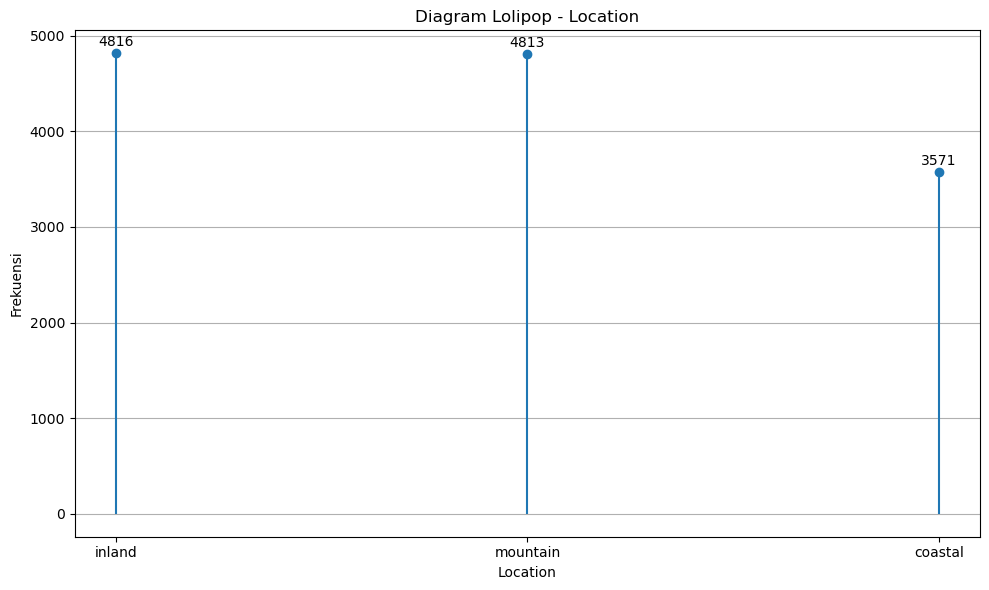

C:\Users\friza nur fatmala\AppData\Local\Temp\ipykernel_5588\3238014012.py:47: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq4.index, freq4.values, basefmt=" ", use_line_collection=True)


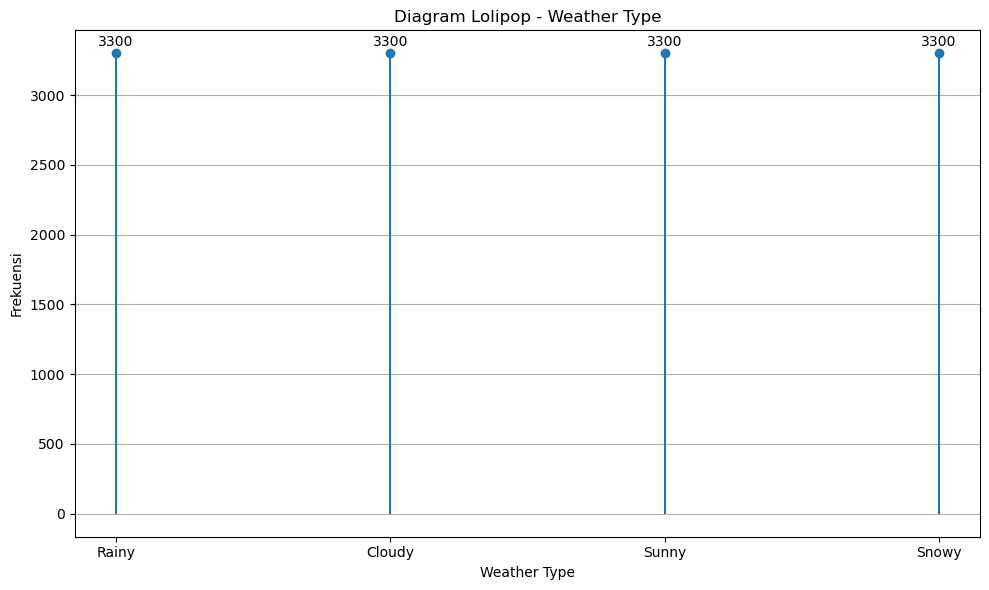

In [16]:
# Menampilkan frekuensi variabel Cloud Cover
col1 = 'Cloud Cover'
freq1 = df[col1].value_counts()
plt.figure(figsize=(10, 6))
plt.stem(freq1.index, freq1.values, basefmt=" ", use_line_collection=True)
plt.title(f'Diagram Lolipop - {col1}')
plt.xlabel(col1)
plt.ylabel('Frekuensi')
for i, value in enumerate(freq1.values):
    plt.annotate(f'{value}', (freq1.index[i], value), textcoords="offset points", xytext=(0,5), ha='center')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Menampilkan frekuensi variabel Season
col2 = 'Season'
freq2 = df[col2].value_counts()
plt.figure(figsize=(10, 6))
plt.stem(freq2.index, freq2.values, basefmt=" ", use_line_collection=True)
plt.title(f'Diagram Lolipop - {col2}')
plt.xlabel(col2)
plt.ylabel('Frekuensi')
for i, value in enumerate(freq2.values):
    plt.annotate(f'{value}', (freq2.index[i], value), textcoords="offset points", xytext=(0,5), ha='center')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Menampilkan frekuensi variabel Location
col3 = 'Location'
freq3 = df[col3].value_counts()
plt.figure(figsize=(10, 6))
plt.stem(freq3.index, freq3.values, basefmt=" ", use_line_collection=True)
plt.title(f'Diagram Lolipop - {col3}')
plt.xlabel(col3)
plt.ylabel('Frekuensi')
for i, value in enumerate(freq3.values):
    plt.annotate(f'{value}', (freq3.index[i], value), textcoords="offset points", xytext=(0,5), ha='center')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Menampilkan frekuensi variabel Weather Type
col4 = 'Weather Type'
freq4 = df[col4].value_counts()
plt.figure(figsize=(10, 6))
plt.stem(freq4.index, freq4.values, basefmt=" ", use_line_collection=True)
plt.title(f'Diagram Lolipop - {col4}')
plt.xlabel(col4)
plt.ylabel('Frekuensi')
for i, value in enumerate(freq4.values):
    plt.annotate(f'{value}', (freq4.index[i], value), textcoords="offset points", xytext=(0,5), ha='center')
plt.grid(axis='y')
plt.tight_layout()
plt.show()